In [83]:
import matplotlib.pyplot as plt

In [84]:
import mesa as ms
import pylab as p
import numpy as np


%matplotlib inline 
p.rcParams['figure.figsize'] = 12, 8  # that's default image size for this interactive session

data_path = "/home/evol/fragkos/disk1/repos/CE_mesa/working/LOGS/"
a = ms.mesa(data_path=data_path, parallel=True, abundances=False, log_abundances = True, Yaxis='mass', Xaxis="log_inv_star_age",czones=False, Variable='v_div_vesc', orbit=True)

Process running in parallel on  48  cores
Process running in parallel on  48  cores


Process running in parallel on  48  cores


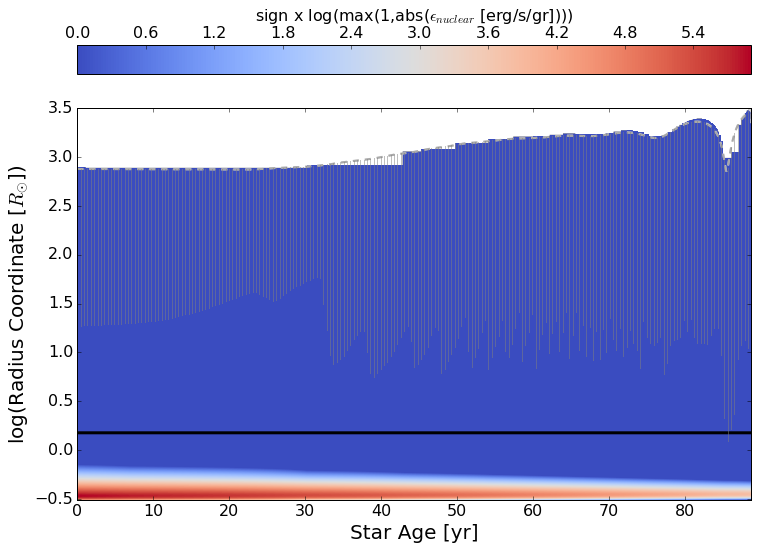

In [85]:
a.SetParameters(Variable='eps_nuc', cmap_dynamic_range=5, tau100=True, Yaxis='log_radius', Xaxis='star_age', czones=True)
a.Kippenhahn()

Process running in parallel on  48  cores


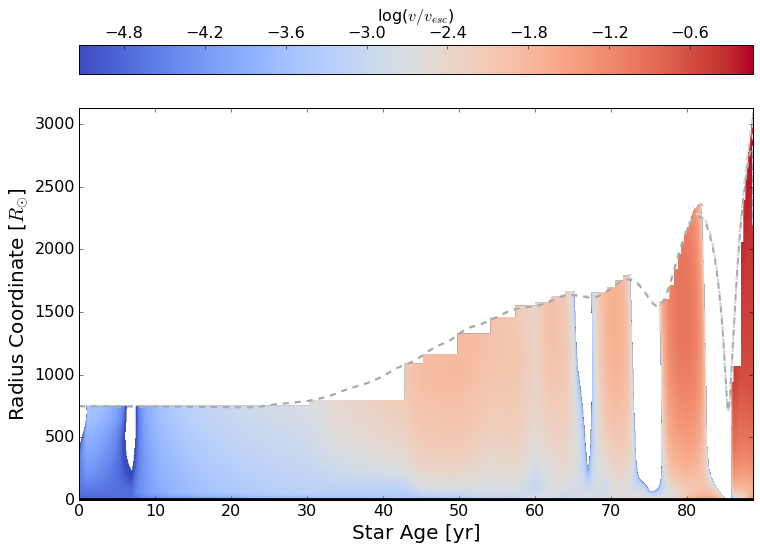

In [86]:
a.SetParameters(cmap_dynamic_range=5, signed_log_cmap=False,Yaxis='radius', Xaxis="star_age", Variable='v_div_vesc', czones=False)
a.Kippenhahn()

Process running in parallel on  48  cores


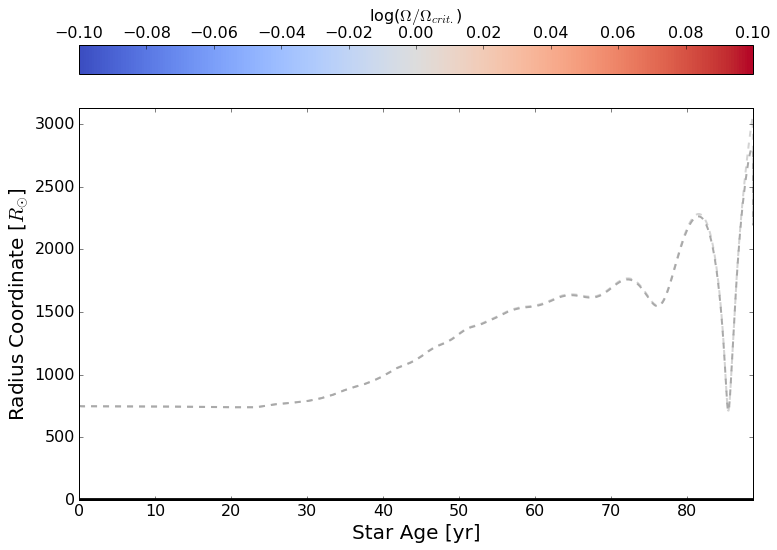

In [87]:
a.SetParameters(cmap_dynamic_range=5, signed_log_cmap=False,Yaxis='radius', Xaxis="star_age", Variable='omega_div_omega_crit')
a.Kippenhahn()

Process running in parallel on  48  cores


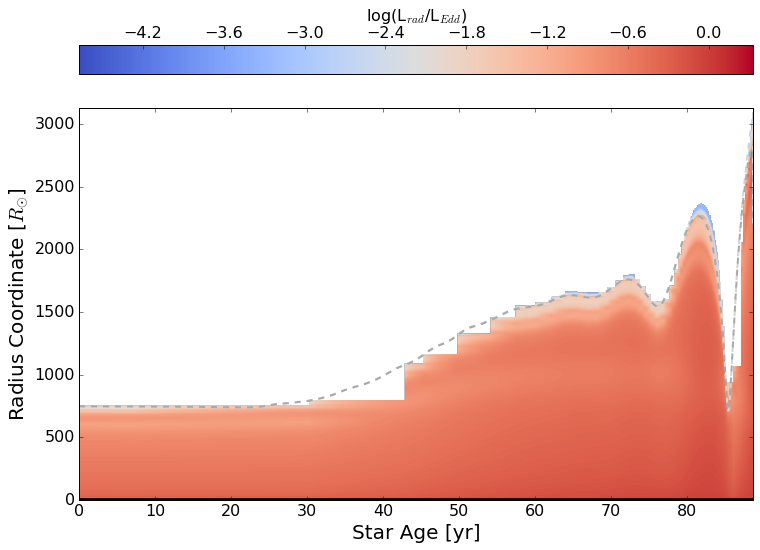

In [88]:
a.SetParameters(Variable='Lrad_div_Ledd', cmap_dynamic_range=5)
a.Kippenhahn()

Process running in parallel on  48  cores


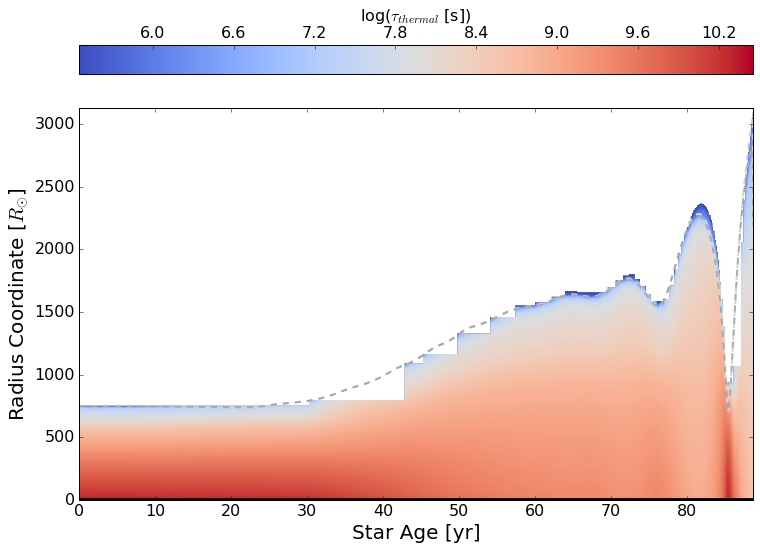

In [89]:
a.SetParameters(Yaxis="radius", Variable='t_thermal', cmap_dynamic_range=5)
a.Kippenhahn()

Process running in parallel on  48  cores


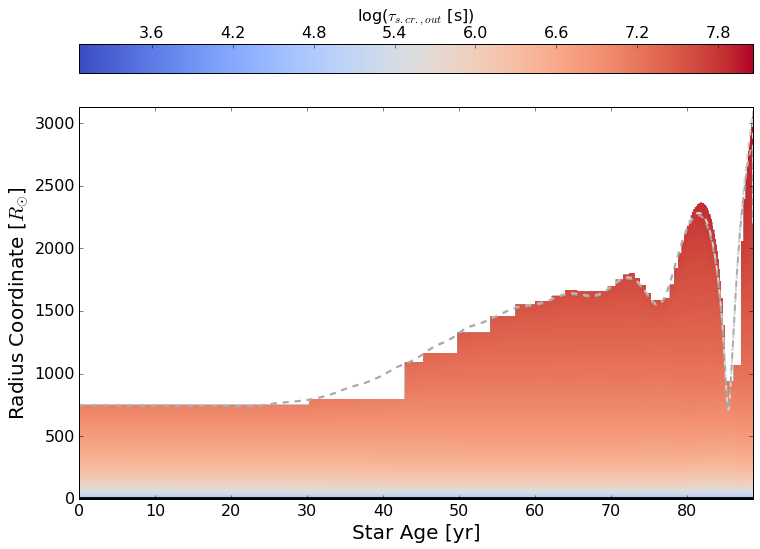

In [90]:
a.SetParameters(Yaxis="radius", Variable='t_dynamical', cmap_dynamic_range=5)
a.Kippenhahn()

Process running in parallel on  48  cores


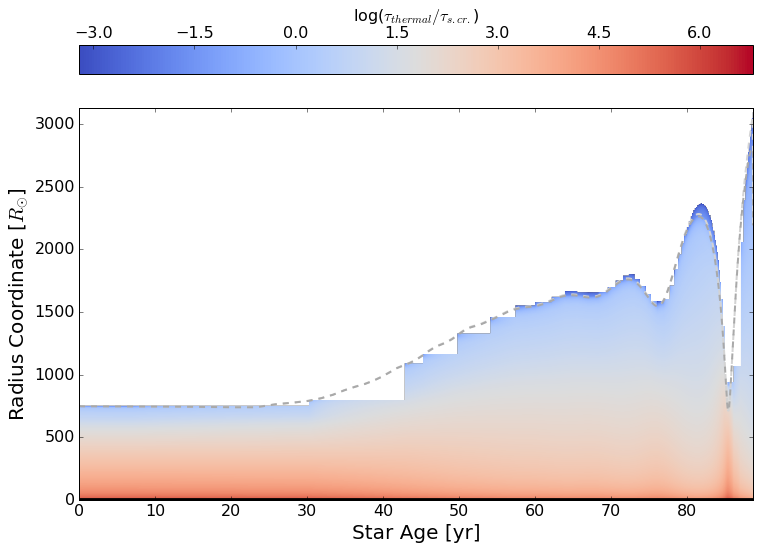

In [91]:
a.SetParameters(Yaxis="radius", Variable='t_thermal_div_t_dynamical', cmap_dynamic_range=10)
a.Kippenhahn()

Process running in parallel on  48  cores


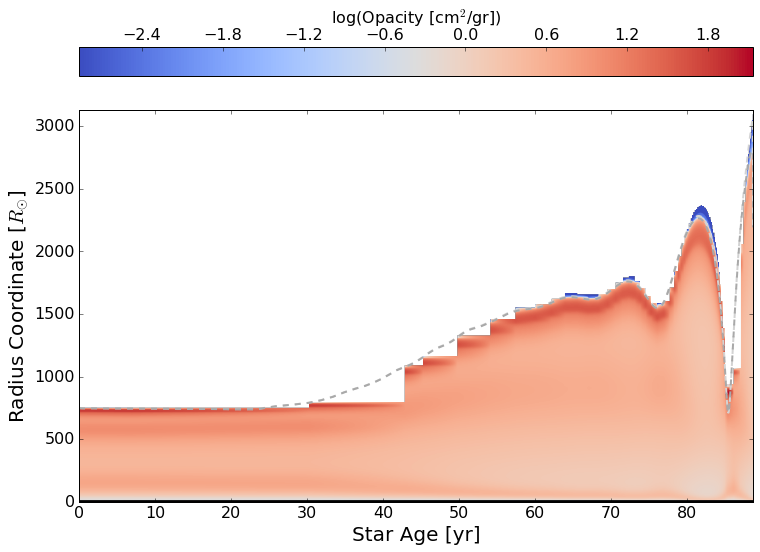

In [92]:
a.SetParameters(Yaxis="radius", Variable='opacity', cmap_dynamic_range=5)
a.Kippenhahn()

Process running in parallel on  48  cores


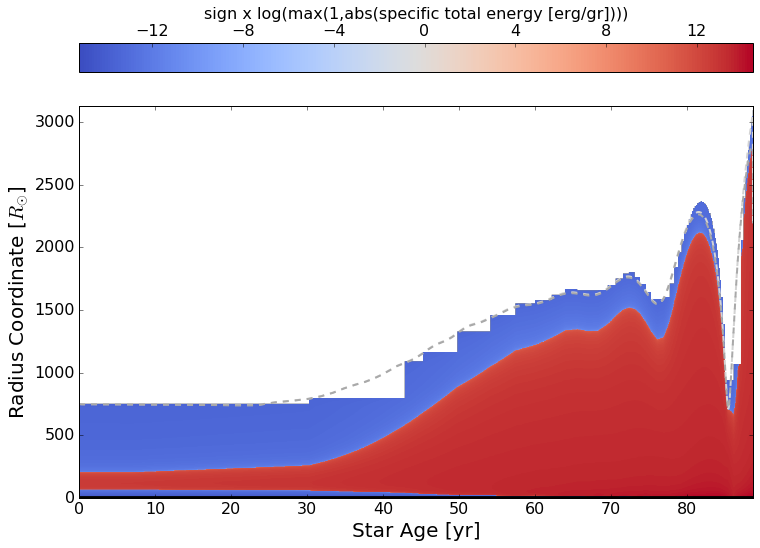

In [93]:
a.SetParameters(Variable='total_energy', cmap_dynamic_range=5,signed_log_cmap=True, tau100=True)
a.Kippenhahn()

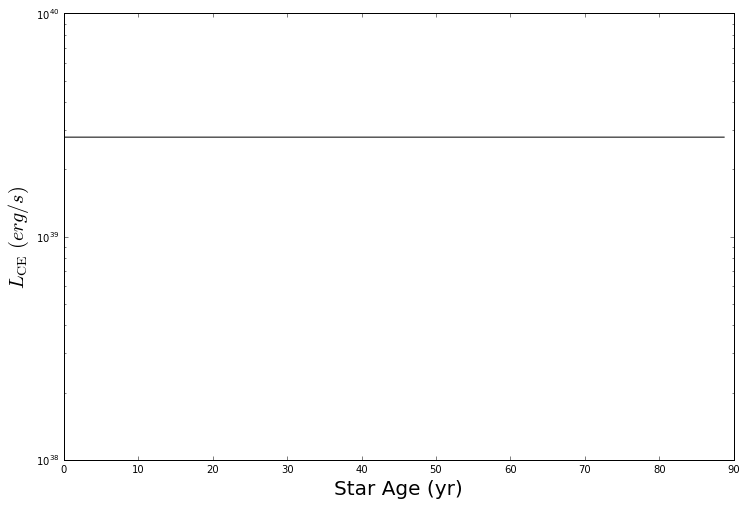

In [94]:
plt.plot(a.history['star_age'], a.history["CE_energy_rate"], color='k')
plt.xlabel('Star Age (yr)', size=20)
plt.ylabel(r'$L_{\rm CE}\ (erg/s)$', size=20)
plt.yscale('log')
plt.ylim(1.0e38, 1.0e40)
plt.show()

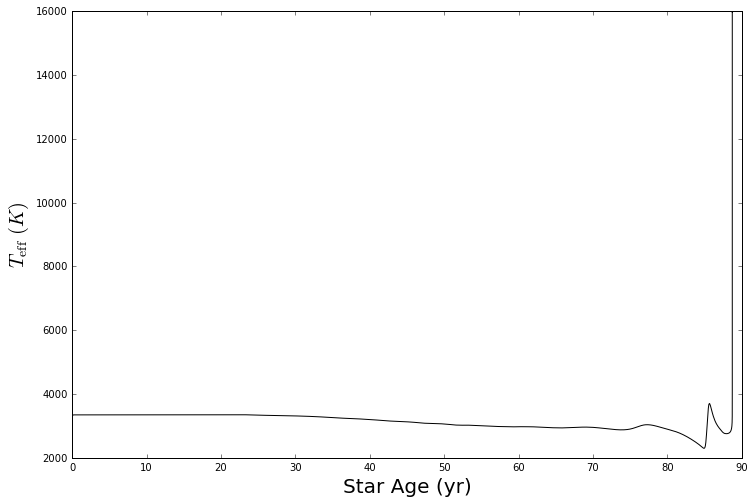

In [95]:
plt.plot(a.history['star_age'], 10**a.history["log_Teff"], color='k')
plt.xlabel("Star Age (yr)", size=20)
plt.ylabel(r'$T_{\rm eff}\ (K)$', size=20)
plt.show()

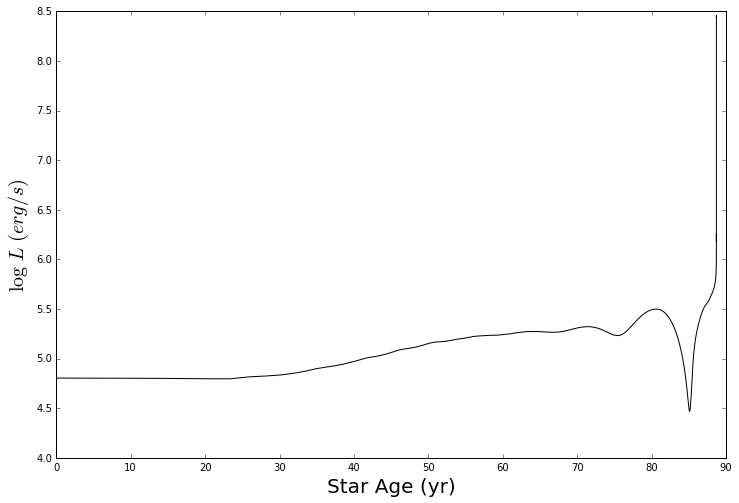

In [108]:
plt.plot(a.history['star_age'], a.history["log_L"], color='k')
plt.xlabel("Star Age (yr)", size=20)
plt.ylabel(r"${\rm log}\ L\ (erg/s)$", size=20)
plt.show()

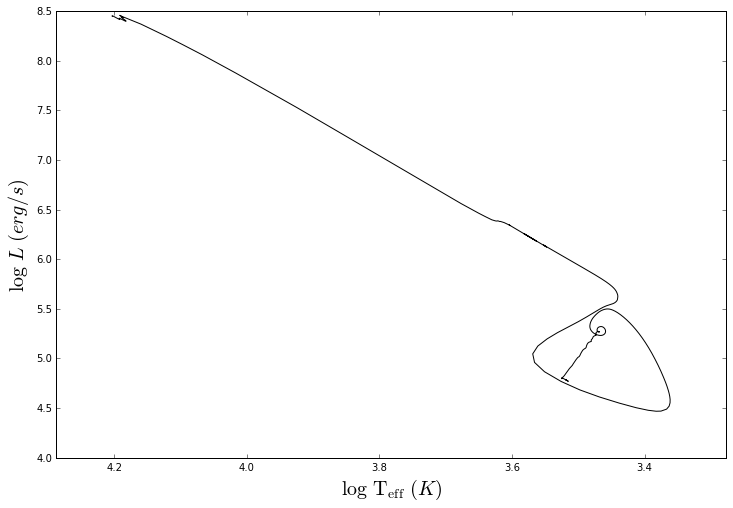

In [97]:
plt.plot(a.history['log_Teff'], a.history["log_L"], color='k')
xwidth = max(a.history['log_Teff']) - min(a.history['log_Teff'])
plt.xlim(0.1*xwidth + max(a.history['log_Teff']), -0.1*xwidth + min(a.history['log_Teff']))
plt.xlabel(r"${\rm log}\ {\rm T}_{\rm eff}\ (K)$", size=20)
plt.ylabel(r"${\rm log}\ L\ (erg/s)$", size=20)
plt.show()

4.08211333439e+49


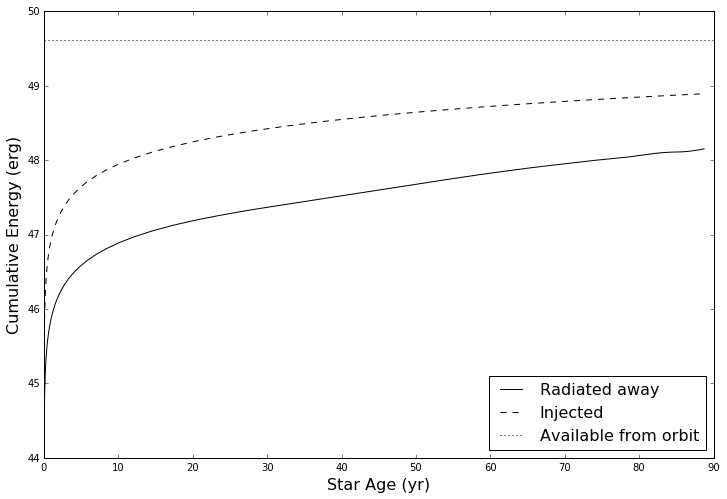

In [140]:
secyer = 31622400.0

lum = 10.0**a.history['log_L']
time_step = 10.0**a.history['log_dt'] * secyer
time = a.history["star_age"]

E_rad = np.cumsum(lum*time_step)
plt.plot(time, np.log10(E_rad * 3.839e33), color='k', label="Radiated away")


E_CE = np.cumsum(time_step*a.history["CE_energy_rate"])
plt.plot(time, np.log10(E_CE), color='k', linestyle='dashed', label="Injected")

Msun = 1.988e33
G = 6.6725e-8
Rsun = 6.957e10
E_available = G*a.history['he_core_mass'][-1]*Msun*Msun/(0.34*Rsun)
print E_available


plt.axhline(np.log10(E_available), color='k', linestyle='dotted', label="Available from orbit")
#plt.text("")

plt.xlabel('Star Age (yr)', size=16)
plt.ylabel('Cumulative Energy (erg)', size=16)

plt.ylim(44, 50)


plt.legend(loc=4, fontsize=16)

plt.show()

Process running in parallel on  48  cores


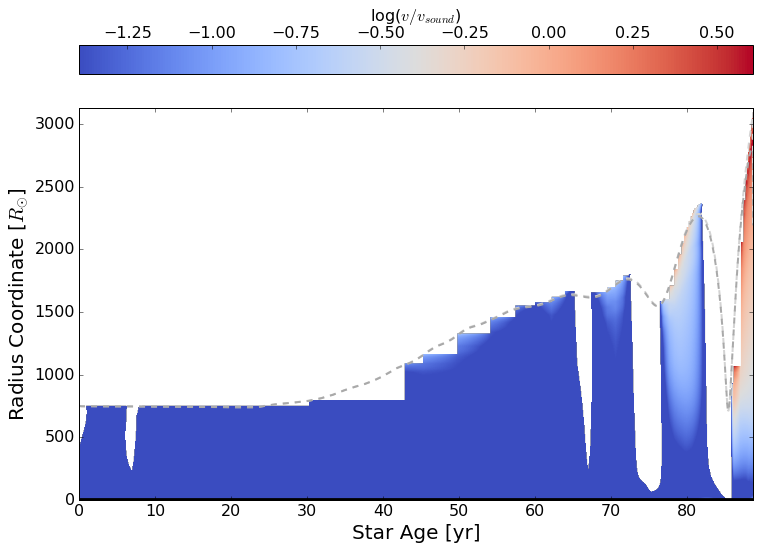

In [98]:
a.SetParameters(Yaxis="radius", Xaxis='star_age',Variable='v_div_csound', cmap_dynamic_range=2,signed_log_cmap=False)
a.Kippenhahn()

Process running in parallel on  48  cores


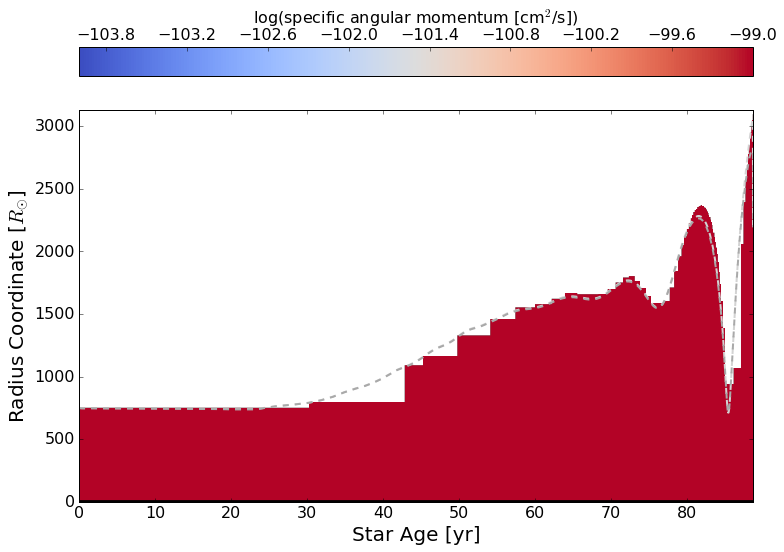

In [99]:
a.SetParameters(Yaxis="radius", Variable='j_rot', cmap_dynamic_range=5,signed_log_cmap=False)
a.Kippenhahn()

Process running in parallel on  48  cores


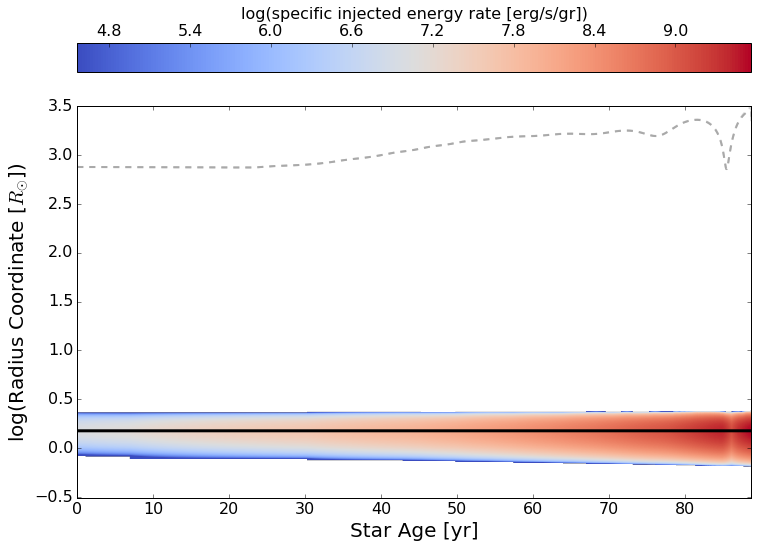

In [100]:

a.SetParameters(Yaxis="log_radius", Variable='extra_heat', cmap_dynamic_range=5,signed_log_cmap=False)
a.Kippenhahn()

Process running in parallel on  48  cores


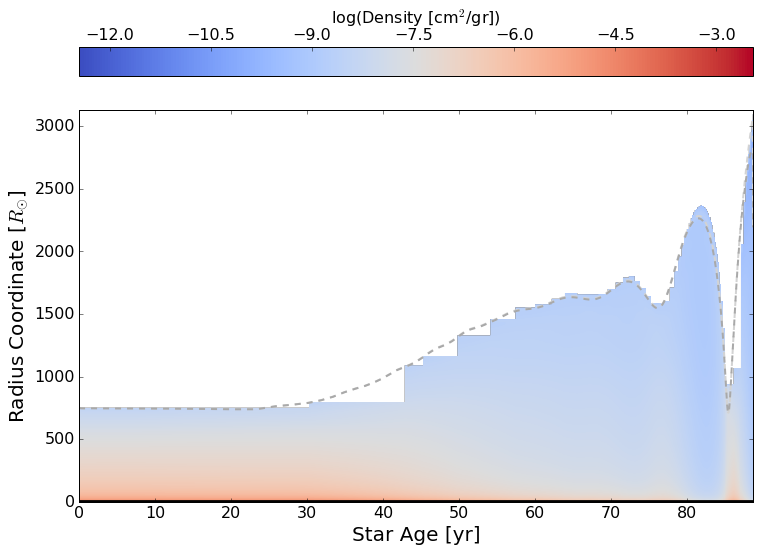

In [101]:
a.SetParameters(Yaxis="radius", Variable='density', cmap_dynamic_range=10,signed_log_cmap=False)
a.Kippenhahn()

Process running in parallel on  48  cores


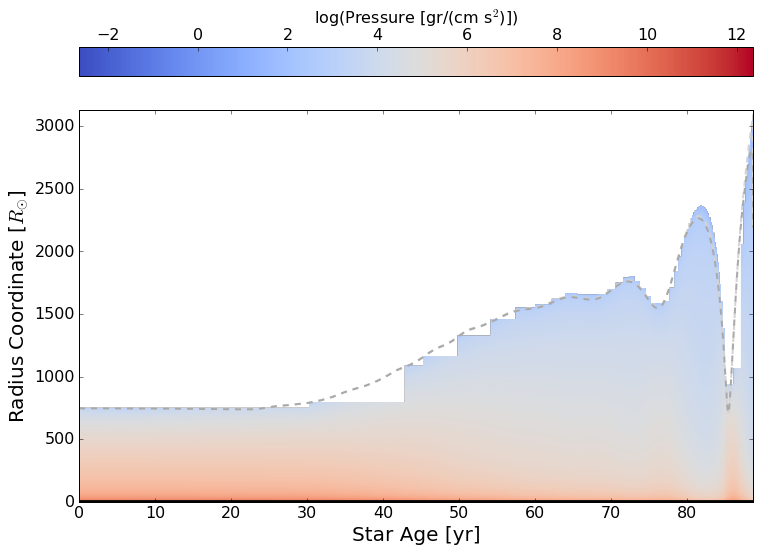

In [102]:
a.SetParameters(Yaxis="radius", Variable='pressure', cmap_dynamic_range=15,signed_log_cmap=False)
a.Kippenhahn()

Process running in parallel on  48  cores


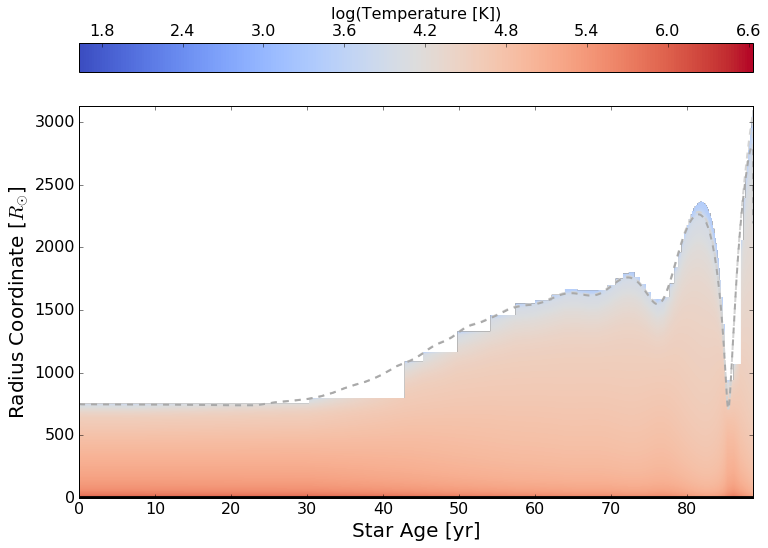

In [103]:
a.SetParameters(Yaxis="radius", Variable='temperature', cmap_dynamic_range=5,signed_log_cmap=False)
a.Kippenhahn()

In [110]:
a.SetParameters(Yaxis="radius", Variable='luminosity', cmap_dynamic_range=5,signed_log_cmap=False)
a.Kippenhahn()

Process running in parallel on  48  cores


ValueError: no field of name luminossity

Process running in parallel on  48  cores


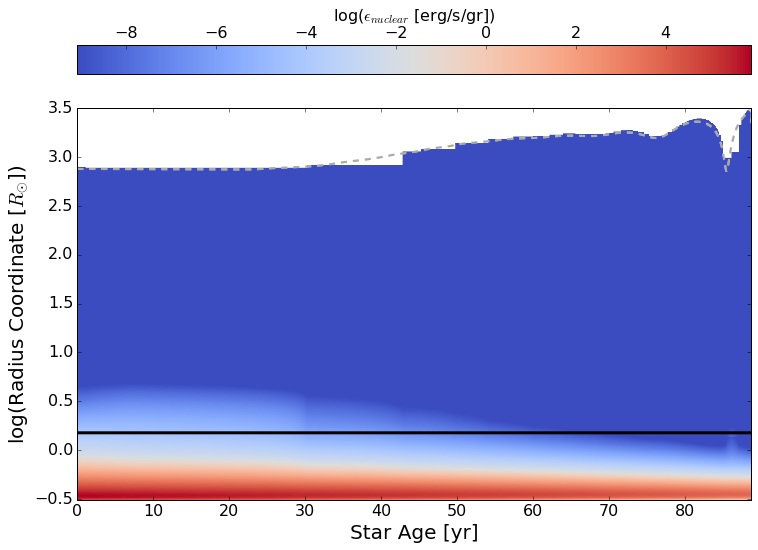

In [104]:
a.SetParameters(Yaxis="log_radius", Variable='eps_nuc', cmap_dynamic_range=15,signed_log_cmap=False)
a.Kippenhahn()